<a href="https://colab.research.google.com/github/Sainasofi/Python_ML_internship_24/blob/main/ProjectDrug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

file_path = '/content/drug200.csv'
data = pd.read_csv(file_path)

data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


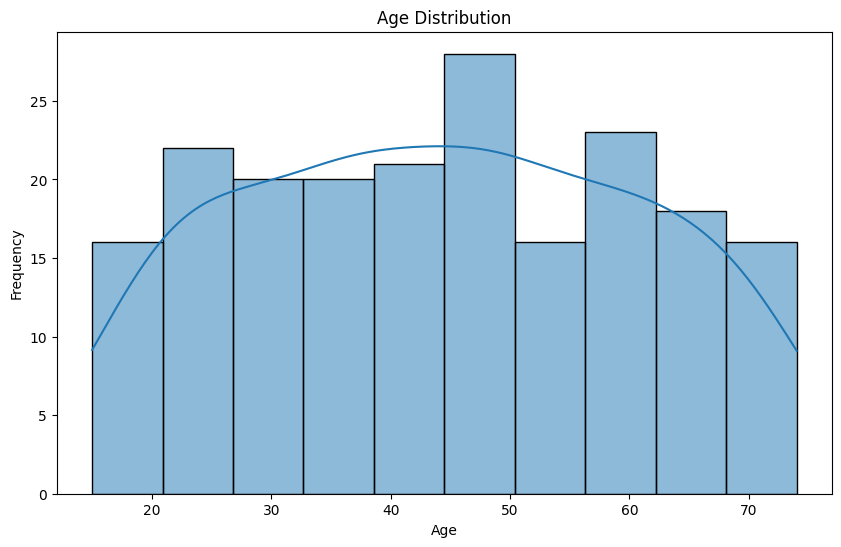

In [ ]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


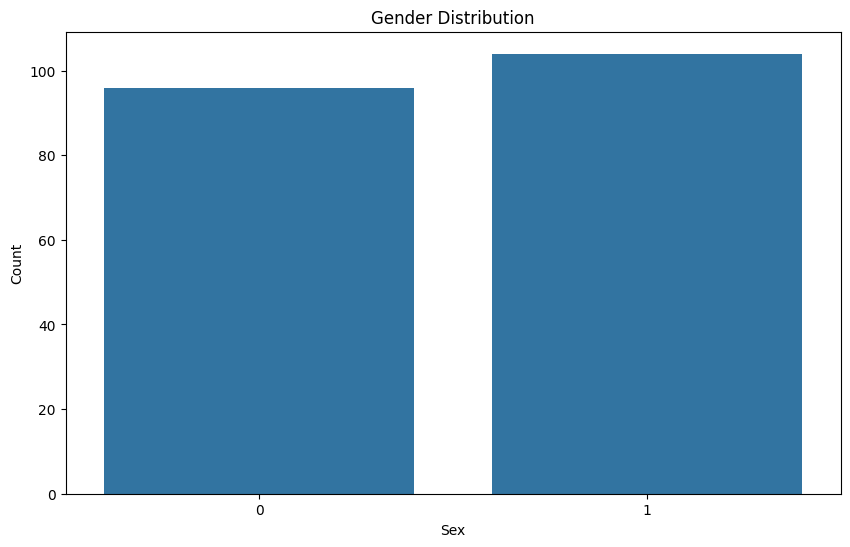

In [ ]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

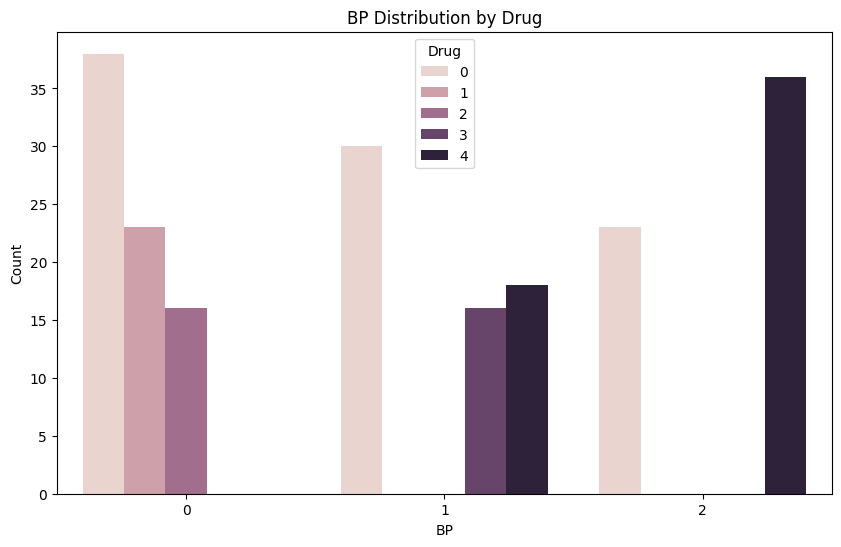

In [ ]:
# BP Distribution by Drug
plt.figure(figsize=(10, 6))
sns.countplot(x='BP', hue='Drug', data=data)
plt.title('BP Distribution by Drug')
plt.xlabel('BP')
plt.ylabel('Count')
plt.show()

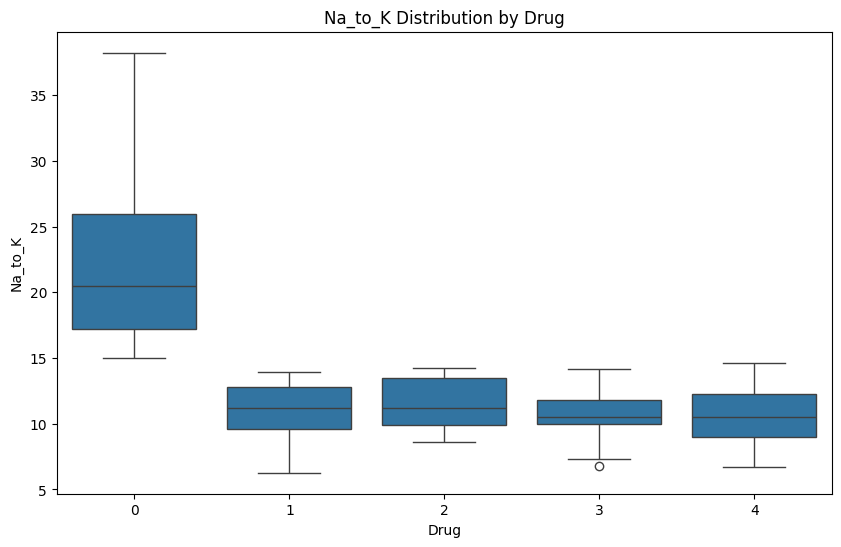

In [ ]:
# Na_to_K Distribution by Drug
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drug', y='Na_to_K', data=data)
plt.title('Na_to_K Distribution by Drug')
plt.xlabel('Drug')
plt.ylabel('Na_to_K')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

# Features and target variable
X = data.drop('Drug', axis=1)
y = data['Drug']
print(X)
print(y)

     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]
0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64


In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.40      0.57         5
           4       0.77      0.91      0.83        11

    accuracy                           0.90        40
   macro avg       0.90      0.86      0.85        40
weighted avg       0.92      0.90      0.89        40

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  3]
 [ 0  0  1  0 10]]


In [ ]:
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Drug'] = y_pred
print(X_test_with_predictions.head())

     Age  Sex  BP  Cholesterol  Na_to_K  Predicted_Drug
95    36    1   1            1   11.424               4
15    16    0   0            1   15.516               0
30    18    0   2            1    8.750               4
158   59    0   1            0   10.444               4
128   47    1   1            1   33.542               0


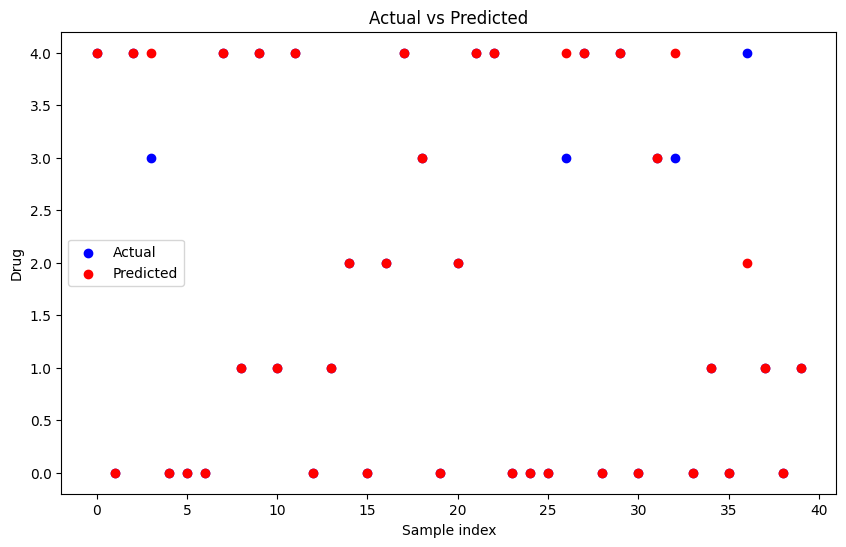

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Sample index')
plt.ylabel('Drug')
plt.legend()
plt.show()